<a href="https://colab.research.google.com/github/YasaminRhd/Pythonia.init/blob/main/Session%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
import pytesseract
import sys 

Saving abcd123.png to abcd123 (10).png


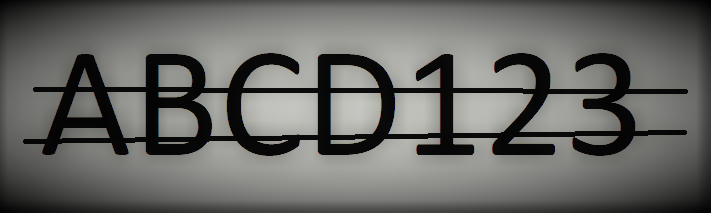

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
img2 = np.array(Image.open(io.BytesIO(uploaded['abcd123.png'])))
display(Image.fromarray(img2))

In [ ]:
def get_string(pic_path):
    # Reading picture with opencv
    pic = cv.imread(pic_path)
    # grey-scale the picture
    pic = cv.cvtColor(pic, cv.COLOR_BGR2GRAY)
    # Do dilation and erosion to eliminate unwanted noises
    kernel = np.ones((1, 1), np.uint8)
    pic = cv.dilate(pic, kernel, iterations=20)
    pic = cv.erode(pic, kernel, iterations=20)
    # Write image after removed noise
    cv.imwrite(main_path + "no_noise.png", pic)
    #  threshold applying to get only black and white picture 
    pic = cv.adaptiveThreshold(pic, 300, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 31, 2)
    # Write the image for later recognition process 
    cv.imwrite(main_path + "threshold.png", pic)
    # Character recognition with tesseract
    final = pytesseract.image_to_string(Image.open(main_path + "threshold.png"),config = r'--psm 10 --oem 3')
    return final


main_path = r'abcd123.png'
# pytesseract.pytesseract.tesseract_cmd = '/content/gdrive/MyDrive/Tesseract-OCR/tesseract.exe'    
 

pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
print(get_string('abcd123.png'))

ABCD123-

